<a href="https://colab.research.google.com/github/Lilly-yang/UCA-Analysis_and_Indexing_of_Images-Videos_in_Big_Data_Systems/blob/main/Lab1_Shallow2Deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mount Google Driver**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# **Downgrading OpenCV from V.4.2 to V.3.4.2.16**

Restart runtime after that.

In [ ]:
!pip uninstall opencv-python
!pip uninstall opencv-contrib-python
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16

Uninstalling opencv-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/cv2/*
    /usr/local/lib/python3.6/dist-packages/opencv_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-python-4.1.2.30
Uninstalling opencv-contrib-python-4.1.2.30:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/opencv_contrib_python-4.1.2.30.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled opencv-contrib-python-4.1.2.30
     |████████████████████████████████| 25.0MB 1.2MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 30.6MB 1.3MB/s 


# **Importing libraries**

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from keras.applications import VGG16

Using TensorFlow backend.


# **SIFT functionalities in OpenCV**

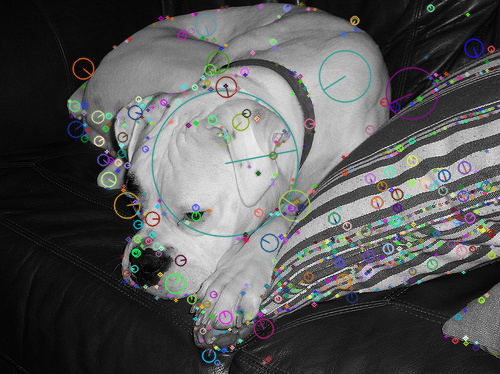

In [ ]:
img = cv.imread('/content/drive/My Drive/Datasets/VOC2007/VOCdevkit/VOC2007/JPEGImages/009961.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None) ##finds the keypoint in the images

###draws the small circles on the locations of keypoints
#img=cv.drawKeypoints(gray,kp,img)

###draw a circle with size of keypoint and it will even show its orientation
img=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#cv.imwrite('/content/drive/My Drive/sift_keypoints.jpg',img)
cv2_imshow(img)

**Calculating the descriptor**

In [ ]:
#kp, des = sift.compute(gray,None) ##already found keypoints
kp, des = sift.detectAndCompute(gray,None) ##didn't find keypoints

print(kp, '/n', des)

[<KeyPoint 0x7f98acf2b030>, <KeyPoint 0x7f98aa5a8e70>, <KeyPoint 0x7f98aa5a8f00>, <KeyPoint 0x7f98aa5a8f90>, <KeyPoint 0x7f98aa5211e0>, <KeyPoint 0x7f98aa521180>, <KeyPoint 0x7f98aa5210f0>, <KeyPoint 0x7f98aa5211b0>, <KeyPoint 0x7f98aa521120>, <KeyPoint 0x7f98aa521210>, <KeyPoint 0x7f98aa521240>, <KeyPoint 0x7f98aa521270>, <KeyPoint 0x7f98aa5212a0>, <KeyPoint 0x7f98aa5212d0>, <KeyPoint 0x7f98aa521300>, <KeyPoint 0x7f98aa521330>, <KeyPoint 0x7f98aa521360>, <KeyPoint 0x7f98aa521390>, <KeyPoint 0x7f98aa5213c0>, <KeyPoint 0x7f98aa5213f0>, <KeyPoint 0x7f98aa521420>, <KeyPoint 0x7f98aa521450>, <KeyPoint 0x7f98aa521480>, <KeyPoint 0x7f98aa5214b0>, <KeyPoint 0x7f98aa5214e0>, <KeyPoint 0x7f98aa521510>, <KeyPoint 0x7f98aa521540>, <KeyPoint 0x7f98aa521570>, <KeyPoint 0x7f98aa5215a0>, <KeyPoint 0x7f98aa5215d0>, <KeyPoint 0x7f98aa521600>, <KeyPoint 0x7f98aa521630>, <KeyPoint 0x7f98aa521660>, <KeyPoint 0x7f98aa521690>, <KeyPoint 0x7f98aa5216c0>, <KeyPoint 0x7f98aa5216f0>, <KeyPoint 0x7f98aa521720>, 

# **Geometric Transformations**

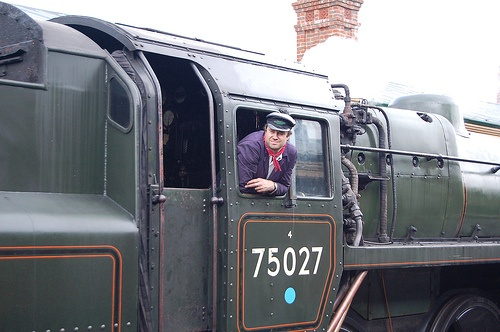

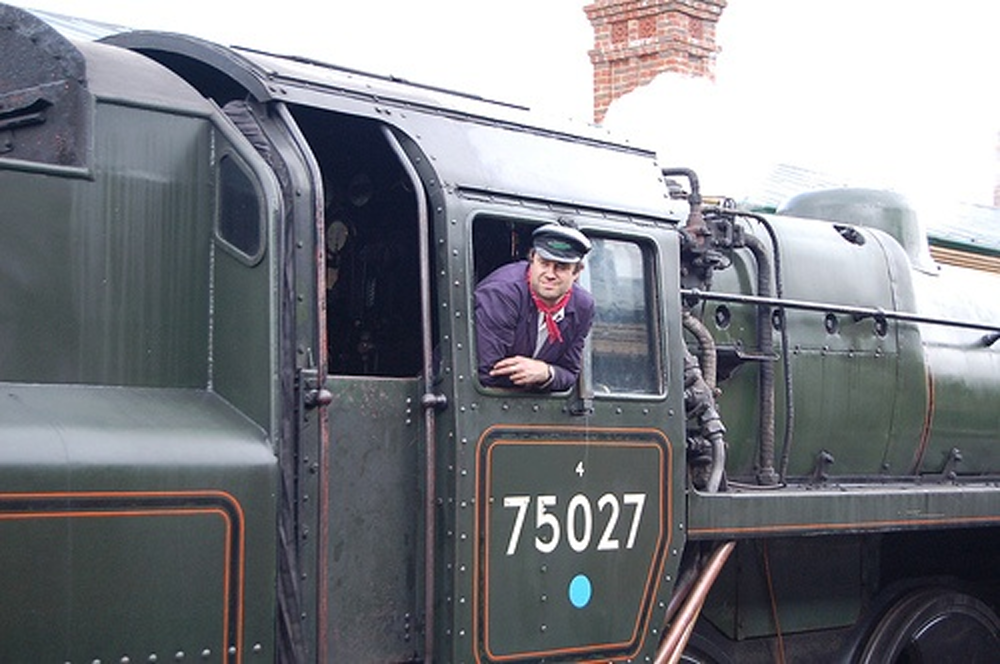

True

In [ ]:
img = cv.imread('/content/drive/My Drive/Datasets/VOC2007/VOCdevkit/VOC2007/JPEGImages/009950.jpg')

#res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
### or
height, width = img.shape[:2]
res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)

cv2_imshow(img)
cv2_imshow(res)
cv.imwrite('/content/drive/My Drive/009950_0.jpg',res)

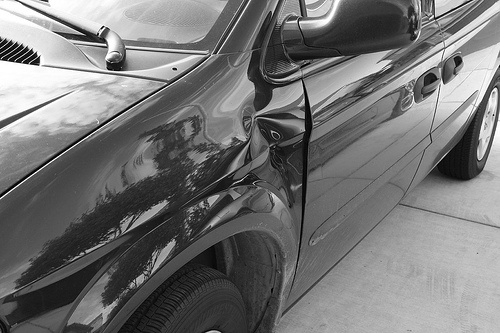

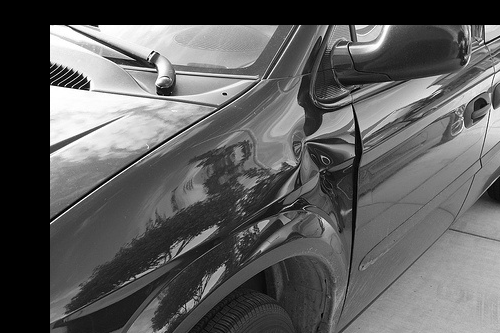

True

In [ ]:
img = cv.imread('/content/drive/My Drive/Datasets/VOC2007/VOCdevkit/VOC2007/JPEGImages/009898.jpg',0)
rows,cols = img.shape
#print(rows, cols)

M = np.float32([[1,0,50],[0,1,25]])
dst = cv.warpAffine(img,M,(cols,rows))

cv2_imshow(img)
cv2_imshow(dst)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imwrite('/content/drive/My Drive/009898_0.jpg',dst)

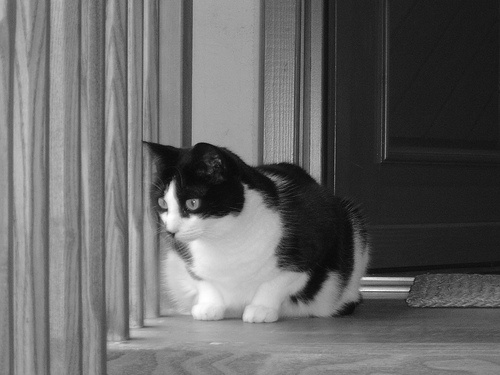

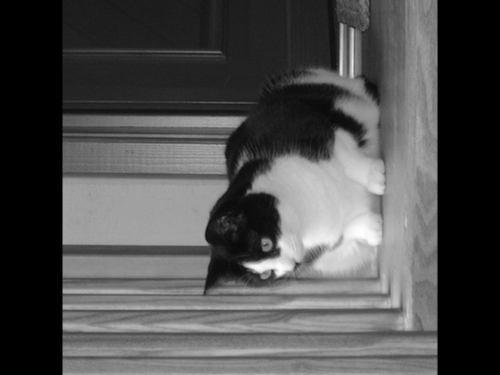

True

In [ ]:
img = cv.imread('/content/drive/My Drive/Datasets/VOC2007/VOCdevkit/VOC2007/JPEGImages/009896.jpg',0)
rows,cols = img.shape

# cols-1 and rows-1 are the coordinate limits.
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))

cv2_imshow(img)
cv2_imshow(dst)

cv.imwrite('/content/drive/My Drive/009896_0.jpg',dst)

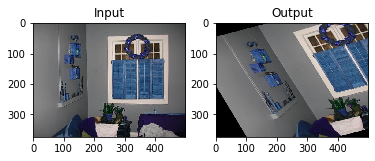

True

In [ ]:
img = cv.imread('/content/drive/My Drive/Datasets/VOC2007/VOCdevkit/VOC2007/JPEGImages/009887.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv.getAffineTransform(pts1,pts2)

dst = cv.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

cv.imwrite('/content/drive/My Drive/009887_0.jpg',dst)

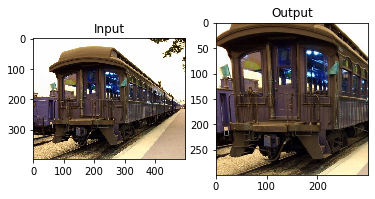

True

In [ ]:
img = cv.imread('/content/drive/My Drive/Datasets/VOC2007/VOCdevkit/VOC2007/JPEGImages/009860.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

cv.imwrite('/content/drive/My Drive/009860_0.jpg',dst)

# **Evaluating matching between pairs of images**
**Loading images, Finding descriptors, etc.**

In [ ]:
img1 = cv.imread('/content/drive/My Drive/Datasets/VOC2007/VOCdevkit/VOC2007/JPEGImages/009887.jpg',cv.IMREAD_GRAYSCALE)  # queryImage
img2 = cv.imread('/content/drive/My Drive/009887_0.jpg',cv.IMREAD_GRAYSCALE) # trainImage

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

**Getting the best matches in two images.**

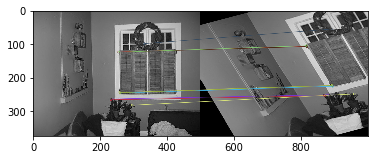

(<matplotlib.image.AxesImage at 0x7f98aa1078d0>, None)

In [ ]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

**Brute-Force Matching with SIFT Descriptors and Ratio Test**

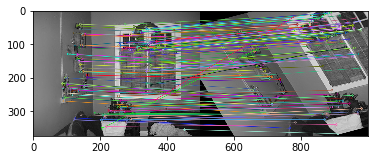

(<matplotlib.image.AxesImage at 0x7f98aa0e5fd0>, None)

In [ ]:
# Initiate SIFT detector
sift = cv.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3),plt.show()

**FLANN based Matcher**

**IndexParams**

In [ ]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)

**ORB**

In [ ]:
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2

**FLANN**

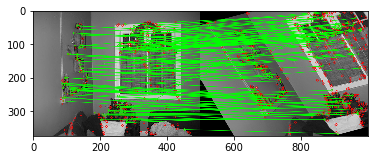

(<matplotlib.image.AxesImage at 0x7f98aa04f828>, None)

In [ ]:
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3,),plt.show()

# **Using Deep Networks to represent Images**

In [ ]:
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False)





58892288/58889256 [==============================] - 2s 0us/step








In [ ]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f9862ef7c50> False
<keras.layers.convolutional.Conv2D object at 0x7f9862ef7d68> False
<keras.layers.convolutional.Conv2D object at 0x7f986f6b7128> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9861c99198> False
<keras.layers.convolutional.Conv2D object at 0x7f9861ca4748> False
<keras.layers.convolutional.Conv2D object at 0x7f9861ca88d0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9861cab630> False
<keras.layers.convolutional.Conv2D object at 0x7f9861cb0f60> False
<keras.layers.convolutional.Conv2D object at 0x7f9861cb2e80> False
<keras.layers.convolutional.Conv2D object at 0x7f9861cb7d68> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9861cc3550> False
<keras.layers.convolutional.Conv2D object at 0x7f9861ccde80> False
<keras.layers.convolutional.Conv2D object at 0x7f9861ccfda0> False
<keras.layers.convolutional.Conv2D object at 0x7f9861cd4c88> False
<keras.layers.pooling.MaxPooling2D object at 0x7f9862e66470>